# Assignment 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from scipy.special import spherical_jn

## **Appendix B, Problem B.5:**
This problem studies underflow and overflow in Python in more detail.

(a) Modify the code in section 2.3.2 to investigate underflow for floating-point numbers in Python. In order to make your output manageable, make sure you start from a number that is sufficiently small.


In [ ]:
small = 1/2**1072
for i in range(5):
  small /= 2
  print(f'1/2^{1072+i} = {small}')

1/2^1072 = 1e-323
1/2^1073 = 5e-324
1/2^1074 = 0.0
1/2^1075 = 0.0
1/2^1076 = 0.0


**Solution:** Here, the smallest float before the system runs into underflow seems to be $\approx 5\times 10^{-324}$. This is a sub-normal number as the smallest normal number is of the range of $10^{-307}$. We can also confirm this by finding the first floating point number after $0$ using NumPy.

In [ ]:
np.nextafter(0, 1)

5e-324

(b) Now investigate whether or not overflow occurs for integers in Python. Do yourself a favor and start not from 1, but from a very large positive number and increment from there. You should use `sys.maxsize` to get the ballpark of near where you should start checking things. You should use `type()` to see if the type changes below `sys.maxsize` and above it.

In [ ]:
import sys
start = sys.maxsize
print('sys.maxsize:', start)
for i in range(start-10000, start*10000, int(start*1000)):
  print(i, type(i))

sys.maxsize: 9223372036854775807
9223372036854765807 <class 'int'>
9232595408891630572807 <class 'int'>
18455967445746406379807 <class 'int'>
27679339482601182186807 <class 'int'>
36902711519455957993807 <class 'int'>
46126083556310733800807 <class 'int'>
55349455593165509607807 <class 'int'>
64572827630020285414807 <class 'int'>
73796199666875061221807 <class 'int'>
83019571703729837028807 <class 'int'>


**Solution:** Here we find that overflow does not occur for integers. This is because Python 3 uses *arbitrary-precision arithmetic*, which means that it uses variable length arrays of digits rather than bits to represent integers. Hence, the integer type is practically unbounded, limited only by the system memory. However, it also is to note that `sys.maxsize` is not the largest `int` value, Python 3 allows us to use larger values as long as there is sufficient available memory.

In [ ]:
# Here, you can see that sys.maxsize depends on the system architecture. For a 64 bit
# system, it happens to be 2^63 - 1, which is the number of bits processed by the CPU in one go (word size).
print(sys.maxsize == 2**63 - 1)

True


---

## **Problem 2.5:**
We now examine a case where plotting a function on the computer can seriously mislead us. The function we wish to plot is: $f(x) = x^6 + 0.1 \log(|1 + 3(1 - x)|)$. Use $100$ points from $x = 0.5$ to $1.5$ to plot this function in matplotlib. Do you see a dip?
Consider the function itself and reason about what you should be seeing. Then use a much finer grid and ensure that you capture the analytically expected behavior.

Text(0, 0.5, 'f(x)')

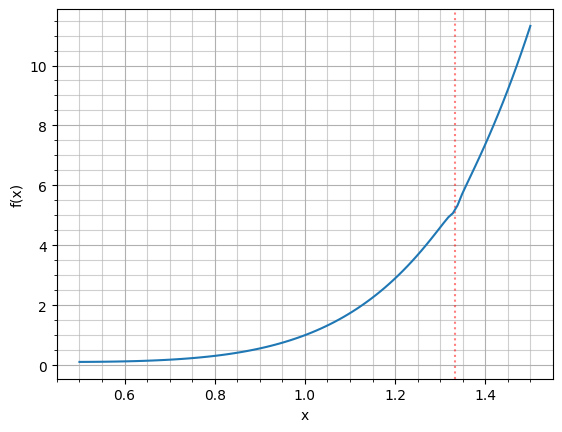

In [ ]:
f = lambda x: x**6 + 0.1*np.log(np.abs(1+(3*(1-x))))
x = np.linspace(0.5, 1.5, 100)
y = f(x)
plt.grid(which='major')
plt.grid(which='minor', alpha=0.6)
plt.minorticks_on()
plt.axvline(4/3, color='red', linestyle=':', alpha=0.5)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

**Solution:** We can see a small dip around $4/3 \approx 1.33$ which is when the function inside the $\log$ goes to zero.
$\lim_{f(x)\rightarrow0}\log f(x)=-\infty$.

Since the resolution of our plot is small (about 0.01), we are barely able to make out the dip. To make out the dip more clearly we need to use a finer grid (higher resolution). The following plot zooms in on the $x$-axis and uses a higher resolution (0.00001).

Text(0, 0.5, 'f(x)')

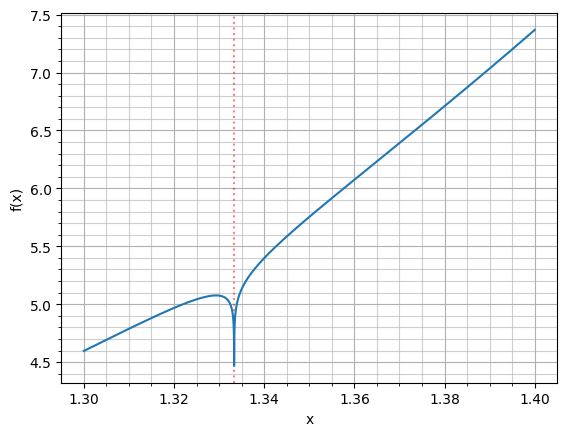

In [ ]:
x = np.arange(1.3, 1.4, 0.00001)
y = f(x)
plt.grid(which='major')
plt.grid(which='minor', alpha=0.6)
plt.minorticks_on()
plt.axvline(4/3, color='red', linestyle=':', alpha=0.5)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')



---

## **Problem 2.7:**
We promised to return to the distinction between catastrophic and benign cancellation. Take $\tilde{x}$ and $\tilde{y}$ to be: $\tilde{x}$ = 1234567891234567.0 and $\tilde{y}$= 1234567891234566.0.

Now, if we try to evaluate $\tilde{x}^2-\tilde{y}^2$ we will experience catastrophic cancellation: each of the squaring operations leads to a rounding error and then the subtraction exacerbates that dramatically. Write a Python code that does the following:

(a) Carries out the calculation $1234567891234567^2 - 1234567891234566^2$ using integers, i.e., exactly.

In [ ]:
x = 1234567891234567
y = 1234567891234566
f1 = (x**2)-(y**2)
f1

2469135782469133

(b) Carries out the subtraction $1234567891234567.0^2-1234567891234566.0^2$ using floats, i.e., exhibiting catastrophic cancellation.

In [ ]:
x = 1234567891234567.0
y = 1234567891234566.0
f2 = (x**2)-(y**2)
f2

2533274790395904.0

**Solution:** Here, the value of the operation is wrong (by around $6 \times 10^{13}$). Hence this operation exhibits catastrophic cancellation while using floats.

(c) Now, we will employ a trick: $x^2 - y^2$ can be re-expressed as $(x - y)(x + y)$. Try using this trick for the floats and see what happens. Does your answer match the integer answer or the catastrophic-cancellation answer? Why?

In [1]:
x = 1234567891234567.0
y = 1234567891234566.0
f3 = (x+y)*(x-y)
f3

2469135782469133.0

**Solution:** Now, the catastrophic cancellation problem is solved. We can compare our new value to the first on using integers as shown below.

In [ ]:
print(f1 == f3)

True




---


## **Problem 2.17:**
In section 2.4.5 backward recursion avoided the problems of forward recursion. Another example is provided by spherical Bessel functions (of the first kind):

$j_{n+1}(x)+j_{n-1}(x)=\frac{2n+1}{x}j_n(x)$

which is analogous to Bonnet's recurrence relation, Eq. (2.86). Evaluate $j_8(0.5)$ in the “naive way”, starting from the known functions:

$j_0(x)=\frac{\sin x}{x},\,\,\,\,j_1(x)=\frac{\sin x}{x^2}-\frac{\cos x}{x}\,\,\,\,...... (2.111)$

and see what goes wrong. Then, use backward recursion starting from $n = 15$. Since your two starting guesses are arbitrary, you should normalize by computing:

$j_8(0.5)=\tilde{j}_8(0.5)\frac{j_0(0.5)}{\tilde{j}_0(0.5)}$

at the end, where $\tilde{j}_0(0.5)$ and $\tilde{j}_8(0.5)$ are the values you computed and $j_0(0.5)$ is the correctly normalized value from Eq. (2.111).

In [5]:
def sperical_bessel_forward(x, nmax=21):
  j0 = np.sin(x)/x
  j1 = (np.sin(x)/x**2) - (np.cos(x)/x)
  jns = [j0, j1]
  for n in range(2, nmax+1):
    j2 = ((2*n+1)/x)*j1 - j0
    jns.append(j2)
    j0, j1 = j1, j2
  return jns

jns = sperical_bessel_forward(0.5, 8)
print('Computed value for x = 0.5 (Actual Value)')
for n in range(0, 9):
  display(Math(f'j_{n} = {jns[n]}\,\,({spherical_jn(n, 0.5)})'))

Computed value for x = 0.5 (Actual Value)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Solution:** Here as you can see, the value starts significantly deviating from $n=3$. Since it is hard to accurately store the value of floats on a computer, small errors could diverge to form significantly large errors for recurrence relations like the one above.

To avoid this, backward recursion is preferred, where the error will be reduced with each iteration.

In [35]:
def spherical_bessel_backward(x, nmax=15):
  j2, j1 = 0.01, 1
  jns = [j2, j1]
  for n in range(nmax, -1, -1):
    j0 = (2*n+3)*j1/x - j2
    jns.append(j0)
    j2, j1 = j1, j0

  jns = np.array(jns[::-1]) # reversing the list
  jns *= (np.sin(x)/x/jns[0]) # normalization
  return jns

jns = spherical_bessel_backward(0.5, 8)
print('Computed value for x = 0.5 (Actual Value)')
for n in range(0, 9):
  display(Math(f'j_{n} = {jns[n]}\,\,({spherical_jn(n, 0.5)})'))

Computed value for x = 0.5 (Actual Value)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Here, the computed values of the bessel function are quite close to the actual values (upto the 16th decimal place).



---

## **Problem 2.18**
We will study the Fourier series of a periodic square wave. As you may already know, this gives rise to what is known as the Gibbs phenomenon, which is a “ringing” effect that appears at discontinuities. Specifically, from $-\pi$ to $\pi$ we have:

$f(x)=\begin{cases}
  1/2 & 0<x<\pi\\    
  -1/2 & -\pi<x<0&     
\end{cases}$

The Fourier series of this function is:

$f(x)=\frac{2}{\pi}\sum_{n=1,3,5,...}\frac{\sin nx}{n}$

(a) Create two Python functions, one for the square wave and another for its Fourier expansion. The latter should take in as an argument the maximum $n$ up to which you wish the sum to go.

In [37]:
def square_wave(xs):
  ys = []
  for x in xs:
    if 0 < x < np.pi:
      ys.append(0.5)
    elif -np.pi < x < 0:
      ys.append(-0.5)
    else:
      ys.append(0)
  return np.array(ys)

def fourier_square_wave(x, nmax=21):
  fx = 0
  for n in range(1, nmax+1, 2):
    fx += np.sin(n*x)/n
    if n >= nmax:
      return 2/np.pi*fx

(b) Plot the square wave and the Fourier-expansion results for $n_\text{max} = 1, 3, 5, 7, 9$ (six curves in total). Where are the oscillation amplitudes largest?

Text(0, 0.5, 'f(x)')

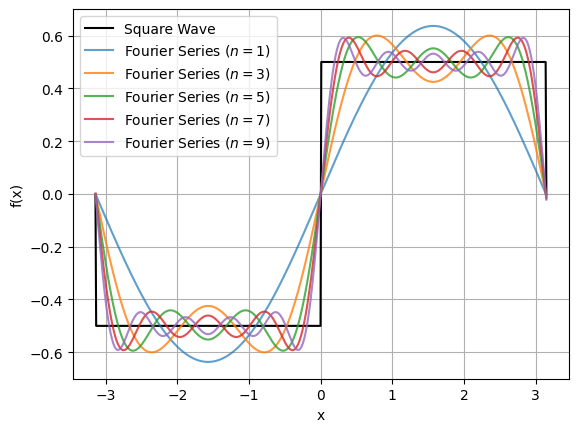

In [39]:
x = np.arange(-np.pi, np.pi+0.01, 0.01)
y = square_wave(x)
y1 = fourier_square_wave(x, nmax=1)
y3 = fourier_square_wave(x, nmax=3)
y5 = fourier_square_wave(x, nmax=5)
y7 = fourier_square_wave(x, nmax=7)
y9 = fourier_square_wave(x, nmax=9)

plt.plot(x, y, label='Square Wave', color='k')
plt.plot(x, y1, label='Fourier Series $(n=1)$', alpha=0.7)
plt.plot(x, y3, label='Fourier Series $(n=3)$', alpha=0.8)
plt.plot(x, y5, label='Fourier Series $(n=5)$', alpha=0.8)
plt.plot(x, y7, label='Fourier Series $(n=7)$', alpha=0.8)
plt.plot(x, y9, label='Fourier Series $(n=9)$', alpha=0.8)

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

**Solution:** Here, one can see that the amplitude of the oscillation is largest for $n=1$ around $x=\pm1.5$ in this case. For subsequent values of $n$ it gets closer to the original square wave and the peak in amplitute shifts to the jump point.

(c) Note that this issue arises not from roundoff error, but from the nature of the
Fourier series itself. To convince yourself that this is, indeed, the case, take the
maximum n value to be 21, 51, 101, and so on. What do you find?

Text(0, 0.5, 'f(x)')

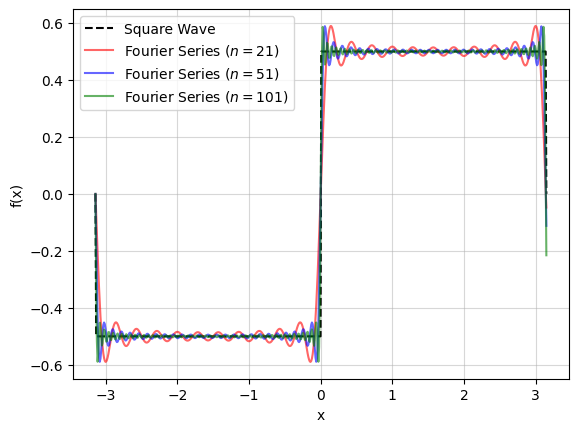

In [45]:
y21 = fourier_square_wave(x, nmax=21)
y51 = fourier_square_wave(x, nmax=51)
y101 = fourier_square_wave(x, nmax=101)

plt.plot(x, y, 'k--', label='Square Wave')
plt.plot(x, y21, 'r', label='Fourier Series $(n=21)$', alpha=0.6)
plt.plot(x, y51, 'b', label='Fourier Series $(n=51)$', alpha=0.6)
plt.plot(x, y101, 'g', label='Fourier Series $(n=101)$', alpha=0.6)

plt.grid(alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

**Solution:** As $n$ increases, the fourier series gets closer to the original square wave in terms of amplitute. But as we can see, there is an overshoot in the oscillatory behavior around the jump point for all values of $n$. This is an inherent behaviour of fourier series known as the *Gibbs phenomenon*, and not any computational error.  